# Chemical Analysis

This last one I wanted to make extra special. The last couple of projects have specifically showcased a scenario that we covered. For this one, I want to show you how to create a project with the concepts that you have learned. <br>
 I am a chemist by trade, so I decided to create a novel dataset for this project by pulling data from [ChEMBL](https://www.ebi.ac.uk/chembl/), a great resource for bioactive molecules with drug-like properties. <br>

The goal in this project is to cluster a set of chemical compounds that are used for therapeutic usage. This clustering is useful because instead of doing months and months of lab analysis, we could focus on similarly grouped compounds to the compound we are studying as a therapeutic drug. 

## Get Data

Here are the filters I used:
1. Type = 'Small Molecules' 

Here's the full query.
```
curl -XPOST "https://www.ebi.ac.uk/chembl/elk/es/chembl_molecule/_search" -H 'Content-Type: application/json' -d'{
  "size": 20,
  "from": 0,
  "_source": [
    "molecule_chembl_id",
    "pref_name",
    "molecule_synonyms",
    "molecule_type",
    "max_phase",
    "molecule_properties.full_mwt",
    "_metadata.related_targets.count",
    "_metadata.related_activities.count",
    "molecule_properties.alogp",
    "molecule_properties.psa",
    "molecule_properties.hba",
    "molecule_properties.hbd",
    "molecule_properties.num_ro5_violations",
    "molecule_properties.rtb",
    "molecule_properties.ro3_pass",
    "molecule_properties.qed_weighted",
    "molecule_properties.cx_most_apka",
    "molecule_properties.cx_most_bpka",
    "molecule_properties.cx_logp",
    "molecule_properties.cx_logd",
    "molecule_properties.aromatic_rings",
    "structure_type",
    "inorganic_flag",
    "molecule_properties.heavy_atoms",
    "molecule_properties.hba_lipinski",
    "molecule_properties.hbd_lipinski",
    "molecule_properties.num_lipinski_ro5_violations",
    "molecule_properties.mw_monoisotopic",
    "molecule_properties.molecular_species",
    "molecule_properties.full_molformula",
    "molecule_structures.canonical_smiles",
    "molecule_structures.standard_inchi_key",
    "natural_product",
    "polymer_flag"
  ],
  "query": {
    "bool": {
      "must": {
        "bool": {
          "boost": 1,
          "must": {
            "bool": {
              "must": [],
              "should": []
            }
          }
        }
      },
      "filter": [
        [
          {
            "bool": {
              "should": [
                {
                  "term": {
                    "molecule_type": "Small molecule"
                  }
                }
              ]
            }
          },
          {
            "bool": {
              "should": [
                {
                  "range": {
                    "molecule_properties.num_ro5_violations": {
                      "gte": 0,
                      "lt": 1
                    }
                  }
                }
              ]
            }
          },
          {
            "bool": {
              "should": [
                {
                  "term": {
                    "withdrawn_flag": false
                  }
                }
              ]
            }
          }
        ]
      ]
    }
  },
  "track_total_hits": true,
  "sort": []
}'
```

When you pull your own dataset, here is a script that I used to clean the data. 

```
cols = ["ChEMBL ID","Name","Synonyms","Type","Max Phase","Molecular Weight","Targets","Bioactivities","AlogP","Polar Surface Area","HBA","HBD","#RO5 Violations","#Rotatable Bonds","Passes Ro3","QED Weighted","CX Acidic pKa","CX Basic pKa","CX LogP","CX LogD","Aromatic Rings","Structure Type","Inorganic Flag","Heavy Atoms","HBA (Lipinski)","HBD (Lipinski)","#RO5 Violations (Lipinski)","Molecular Weight (Monoisotopic)","Molecular Species","Molecular Formula","Smiles","Inchi Key"]

import pandas as pd

#the data has an excess number of quotes
df = pd.read_csv(<whatever your file name is>,skiprows=1,header=None,delimiter=';"',names=cols)

#Need to clean the excess quotes
for col in df.columns:
  df[col] = df[col].str.replace('"', '')
```


In [3]:
import pandas as pd
df = pd.read_csv('chemistry-subset-clean.csv')

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_94745/1905440285.py:2: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('chemistry-subset-clean.csv')


In [4]:
df.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL539070,NaN,NaN,Small molecule,0,286.79,1.0,1.0,2.28,73.06,...,-1,17,5,3,0,250.0888,NEUTRAL,C11H15ClN4OS,CCCOc1ccccc1-c1nnc(NN)s1.Cl,"WPEWNRKLKLNLSO-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
1,CHEMBL2419030,NaN,NaN,Small molecule,0,359.33,4.0,4.0,3.94,85.13,...,-1,24,6,1,0,359.0551,NEUTRAL,C14H12F3N3O3S,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,"QGDMYSDFCXOKML-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
2,CHEMBL3465961,NaN,NaN,Small molecule,0,319.42,16.0,22.0,2.22,50.50,...,-1,23,4,1,0,319.2060,BASE,C18H26FN3O,CC(O)CN1CCC(CN(C)Cc2cc(C#N)ccc2F)CC1,"FZEVYCHTADTXPM-UHFFFAOYSA-N,,,,,,,,,,,,,,,"
3,CHEMBL194112,NaN,NaN,Small molecule,0,366.38,2.0,3.0,4.80,57.53,...,-1,26,3,2,0,366.1443,NEUTRAL,C20H21F3O3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)C(F)(F)F)=C2O,"FIBOSLUEJGPVMK-RYCRIANLSA-N,,,,,,,,,,,,,,,"
4,CHEMBL2047226,NaN,NaN,Small molecule,0,452.40,4.0,8.0,4.93,53.08,...,-1,29,5,2,0,451.1372,NEUTRAL,C23H26BrN5,Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1,"WOAVNWHCIXCOIZ-UHFFFAOYSA-N,,,,,,,,,,,,,,,"


In [5]:
df.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')

In [18]:
filtered_df = df[['Molecular Weight','Targets','Bioactivities','Polar Surface Area','HBA', 'HBD','Aromatic Rings', 'Inorganic Flag', 'Heavy Atoms',
'#Rotatable Bonds']]

In [19]:
filtered_df.describe()

,Molecular Weight,Targets,Bioactivities,Polar Surface Area,HBA,HBD,Aromatic Rings,Inorganic Flag,Heavy Atoms,#Rotatable Bonds
count,99999.000000,97957.000000,97957.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,352.628512,9.939606,15.567718,73.260337,4.765718,1.353534,2.211582,-0.991960,24.539665,4.647526
std,78.478559,20.706386,81.849269,30.033999,1.821115,1.102102,1.048502,0.089306,5.540197,2.489056
min,27.030000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,298.430000,2.000000,3.000000,52.310000,3.000000,1.000000,2.000000,-1.000000,21.000000,3.000000
50%,353.340000,4.000000,6.000000,71.110000,5.000000,1.000000,2.000000,-1.000000,25.000000,4.000000
75%,410.385000,10.000000,14.000000,91.840000,6.000000,2.000000,3.000000,-1.000000,29.000000,6.000000
max,927.020000,1078.000000,7272.000000,294.420000,10.000000,5.000000,7.000000,0.000000,37.000000,24.000000


In [20]:
filtered_df.nunique()

Molecular Weight      17214
Targets                 275
Bioactivities           481
Polar Surface Area     9784
HBA                      11
HBD                       6
Aromatic Rings            8
Inorganic Flag            2
Heavy Atoms              37
#Rotatable Bonds         25
dtype: int64

Before we go any further, let me explain to you what the columns mean. 

**Molecular Weight** - molecular weight of the parent form of the moleculie <br>
**Targets** - the biochemical entity to which the drug first binds in the body to elicit its effect <br>
**Bioactivities** - reactivity with biological matter<br>
**Polar Surface Area** - defined as the surface sum over all polar atoms or molecules including their attached hydrogen atoms;commonly used medicinal chemistry metric for the optimization of a drug's ability to permeate cells<br>
**HBA** - count of the number of Hydrogen Bond Acceptors <br>
**HBD** - count of the number of Hydrogen Bond Donors <br>
**Aromatic Rings** - the number of aromatic rings in the molecule <br>
**Inorganic Flag** - whether an inorganic compound is in the moecule <br>
**Heavy_Atoms** - the number of non-hydrogen atoms in the molecule <br>
**Rotatable Bonds** - how many bonds can be rotated

## Exploratory Data Analysis (EDA)

We have not talked about exploratory data analysis (EDA) just yet, so our first task is to define it:

EDA is a process of examining data sets to see what they can tell us. It is not a formal statistical technique, but rather a set of heuristics for understanding the data and what it might mean. EDA is often used in the early stages of an investigation or research project to get an idea about the data, identify patterns and outliers, and develop hypotheses about relationships between variables.

The goal of EDA is to provide new insights into the dataset that would not be possible from just looking at summary statistics or plots of the data.

In [21]:
filtered_df.isnull().sum()

Molecular Weight         0
Targets               2042
Bioactivities         2042
Polar Surface Area       0
HBA                      0
HBD                      0
Aromatic Rings           0
Inorganic Flag           0
Heavy Atoms              0
#Rotatable Bonds         0
dtype: int64

<AxesSubplot:>

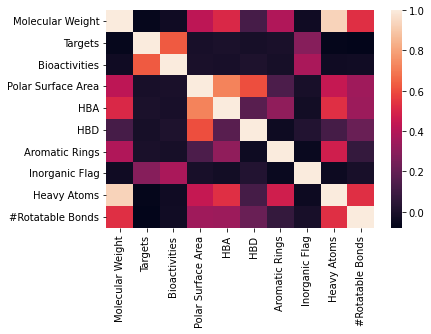

In [22]:
import seaborn as sns
corr = filtered_df.corr()
sns.heatmap(corr)

Some of these correlations make sense. 
High molecular weight would correspond with:
1. Heavy Atoms 
2. Number of rotatable bonds (you will have more bonds to rotate)
3. Large polar surface area 

## Feature engineering

Feature engineering is *very* project specific, so it is hard to generalize. However, here are some things that I can suggest: <br><br>
1. dates - are there trends among years, months, days of the month? Seasonality?
2. aggregates - are you looking at items bought? is there a trend among when they buy goods? 

This particular project does not have a whole lot to feature engineer. We have characteristics of small compounds in our dataset, so there is
not much else we could extract. 

In [31]:
filtered_df.dtypes

Molecular Weight      float64
Targets               float64
Bioactivities         float64
Polar Surface Area    float64
HBA                     int64
HBD                     int64
Aromatic Rings          int64
Inorganic Flag          int64
Heavy Atoms             int64
#Rotatable Bonds        int64
dtype: object

Before we can do kmeans, we need to remove all of the null values. This is a standard procedure for most machine learning methods. 

In [32]:
filtered_df.dropna(inplace=True)

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_94745/724713040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)



## Training

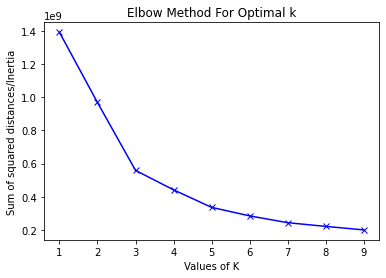

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,10,1)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(filtered_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()
  

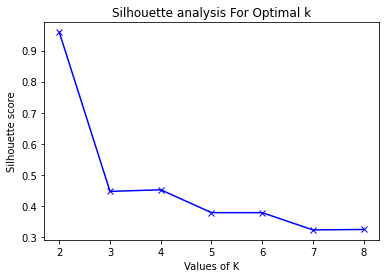

In [34]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(filtered_df)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(filtered_df, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Between these two plots, I would use **k=3**. interesting to note is that the elbow method (first one) took 3 seconds whereas silhoutte score took ~11 mins.  If you have a ton of data, I would suggest going the elbow route. 

In [36]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(filtered_df)

In [39]:
filtered_df['cluster_labels'] = labels

/var/folders/cj/hrhd1p993b156lcvtr84zr8h0000gn/T/ipykernel_94745/2041583613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cluster_labels'] = labels


In [42]:
filtered_df.groupby('cluster_labels').median()

,Molecular Weight,Targets,Bioactivities,Polar Surface Area,HBA,HBD,Aromatic Rings,Inorganic Flag,Heavy Atoms,#Rotatable Bonds
cluster_labels,,,,,,,,,,
0,298.37,5.0,7.0,58.91,4.0,1.0,2.0,-1.0,21.0,3.0
1,409.49,4.0,6.0,83.56,5.0,1.0,3.0,-1.0,29.0,6.0
2,314.41,221.0,2231.0,72.83,4.0,1.0,2.0,0.0,22.0,4.0


/Users/silvergenova/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
/Users/silvergenova/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


ValueError: Invalid color 0

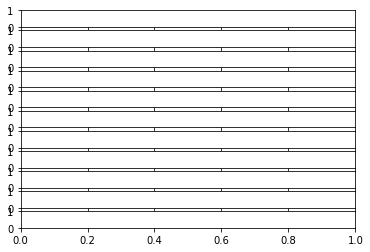

In [50]:
filtered_df.plot(subplots=True,color=filtered_df.cluster_labels, cmap='Set3')

**References**

Mendez D, Gaulton A, Bento AP, Chambers J, De Veij M, F√©lix E, Magari√±os MP, Mosquera JF, Mutowo P, Nowotka M, Gordillo-Mara√±√≥n M, Hunter F, Junco L, Mugumbate G, Rodriguez-Lopez M, Atkinson F, Bosc N, Radoux CJ, Segura-Cabrera A, Hersey A, Leach AR. ChEMBL: towards direct deposition of bioassay data. Nucleic Acids Res. 2019 47(D1):D930-D940. DOI: 10.1093/nar/gky1075